In [1]:
import pandas as pd
# three columns are always the same and we will not use the URL column
# also the title column is a duplicate of the description column, which is unfortunate
# and the three price columns are always the same
df = pd.read_csv(filepath_or_buffer='/kaggle/input/bookstore/bookdata.csv').drop(columns=['num_reviews', 'product_type', 'tax', 'url',
                                                                                         'title', 'price_excl_tax', 'price_incl_tax'])
df.head()

,availability,category,description,price,stars,upc
0,19,default,"Since her assault, Miss Annette Chetwynd has b...",13.99,2,0312262ecafa5a40
1,20,fiction,"Dans une France assez proche de la nôtre, un h...",50.10,1,6957f44c3847a760
2,19,young adult,Patient Twenty-nine.A monster roams the halls ...,22.65,1,f77dbf2323deb740
3,20,history,From a renowned historian comes a groundbreaki...,54.23,5,4165285e1663650f
4,20,historical fiction,"""Erotic and absorbing...Written with starling ...",53.74,1,90fa61229261140a


In [2]:
from plotly.express import histogram
histogram(data_frame=df, x='availability', nbins=21).show()
histogram(data_frame=df, x='stars', nbins=5).show()
histogram(data_frame=df, x='price', nbins=100).show()

I think we would expect our star values to be distributed differently: people tend to love or hate things, so we would expect relatively few books with two or three stars.

In [3]:
from plotly.express import bar
bar(data_frame=df['category'].value_counts().to_frame().reset_index(), x='category', y='count')

It is kind of surprising to see so many products in the "sequential art" and "add a comment" categories. We may have some data quality issues.

In [4]:
from plotly.express import imshow
imshow(img=df[['price', 'stars', 'availability']].corr())

Price, availability, and stars are uncorrelated, which is kind of strange.

In [5]:
from plotly.express import scatter
scatter(data_frame=df, color='availability', x='price',  y='stars', hover_name='upc').show()
scatter(data_frame=df, color='stars', x='price',  y='availability', hover_name='upc').show()

We might expect to see price driving either popularity or inventory, but we don't see that here.

(-0.5, 1199.5, 1199.5, -0.5)

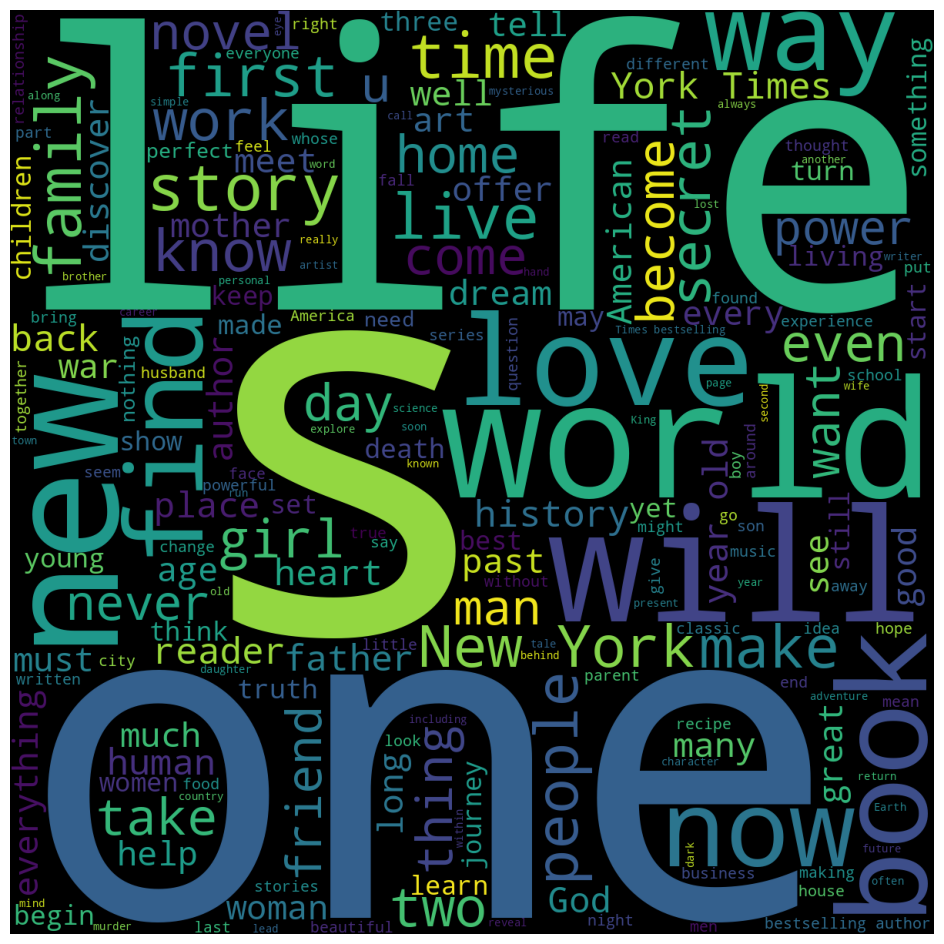

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(df['description'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

This is bland but not super surprising, is it? These are the common words we might expect in book descriptions where the dominant category is "default."